In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

df = pd.read_csv("mushrooms.csv")



In [43]:
X = df.drop(["veil-type","bruises","gill-spacing","gill-size","stalk-shape","stalk-root","stalk-surface-above-ring","stalk-surface-below-ring","stalk-color-above-ring","stalk-color-below-ring","ring-number","ring-type","spore-print-color"], axis=1)
X = pd.get_dummies(X,drop_first=True)
Y = X["class_p"]
X = X.drop(["class_p"],axis=1)
print(X.shape , Y)

(8124, 51) 0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class_p, Length: 8124, dtype: uint8


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.4)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

print("train_score = ",lr.score(X_train,y_train))
print("test_score = ", lr.score(X_test,y_test))

deci = lr.decision_function(X_train[1:4])
print(deci)
from scipy.special import expit
print("원래데이터 마지막꺼만 독성","\n",Y[1:4],expit(deci))
a = lr.coef_.reshape(-1,1)
for x,z in zip(a,lr.feature_names_in_):
    print(x ,"*", z , end=" , ")
print(",",lr.intercept_)


train_score =  0.9922035289290111
test_score =  0.9910769230769231
[-5.59580213 -3.86728684  5.55556232]
원래데이터 마지막꺼만 독성 
 1    0
2    0
3    1
Name: class_p, dtype: uint8 [0.00369968 0.02048656 0.99614899]
[0.83181272] * cap-shape_c , [-0.77594299] * cap-shape_f , [0.12117518] * cap-shape_k , [-0.88147049] * cap-shape_s , [-1.01941503] * cap-shape_x , [0.80577581] * cap-surface_g , [0.32577387] * cap-surface_s , [0.47165111] * cap-surface_y , [-1.04971995] * cap-color_c , [-0.94623426] * cap-color_e , [-0.91858616] * cap-color_g , [-0.9048901] * cap-color_n , [1.07593793] * cap-color_p , [-0.44553667] * cap-color_r , [-0.41707508] * cap-color_u , [-0.25684308] * cap-color_w , [-0.47716781] * cap-color_y , [6.21117193] * odor_c , [6.99161387] * odor_f , [-2.48561491] * odor_l , [2.41599344] * odor_m , [-2.24291422] * odor_n , [5.72693347] * odor_p , [3.82145036] * odor_s , [3.79845307] * odor_y , [0.97813071] * gill-attachment_f , [-1.11484017] * gill-color_e , [-0.14106111] * gill-colo

In [62]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv("mushrooms.csv")
df = df.astype("category")
le=LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])
X = df.drop(["veil-type","bruises","gill-spacing","gill-size","stalk-shape","stalk-root","stalk-surface-above-ring","stalk-surface-below-ring","stalk-color-above-ring","stalk-color-below-ring","ring-number","ring-type","spore-print-color"], axis=1)
X = pd.get_dummies(X,drop_first=True)
Y = X["class"]
X = X.drop(["class"],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.2)
Rtree = DecisionTreeRegressor(random_state=1,min_samples_leaf=30,max_depth=10)
Rtree.fit(X_train,y_train)

print("Train Tree ", Rtree.score(X_train,y_train))
print("test Tree ", Rtree.score(X_test,y_test))


Train Tree  0.9519932355328251
test Tree  0.9389375963307726


In [75]:
from sklearn.model_selection import GridSearchCV

parms = {'min_impurity_decrease':[0.0001,0.0002,0.0003,0.0004,0.0005],
         'max_depth' : range(5,50,1),
         'min_samples_split' : range(2,100,10)}

gs = GridSearchCV(DecisionTreeRegressor(random_state=42), parms,n_jobs=-1)
gs = gs.fit(X_train, y_train)
bst = gs.best_params_
print(gs.best_score_)
print(bst)
DTR = DecisionTreeRegressor(random_state=42,min_impurity_decrease=0.0001,min_samples_split=2,max_depth=15)
DTR.fit(X_train,y_train)
print("DTR : ", DTR.score(X_train,y_train))
print("DTR : ", DTR.score(X_test,y_test))

0.9786341673010313
{'max_depth': 15, 'min_impurity_decrease': 0.0001, 'min_samples_split': 2}
DTR :  0.9770676771988417
DTR :  0.9686842529882668


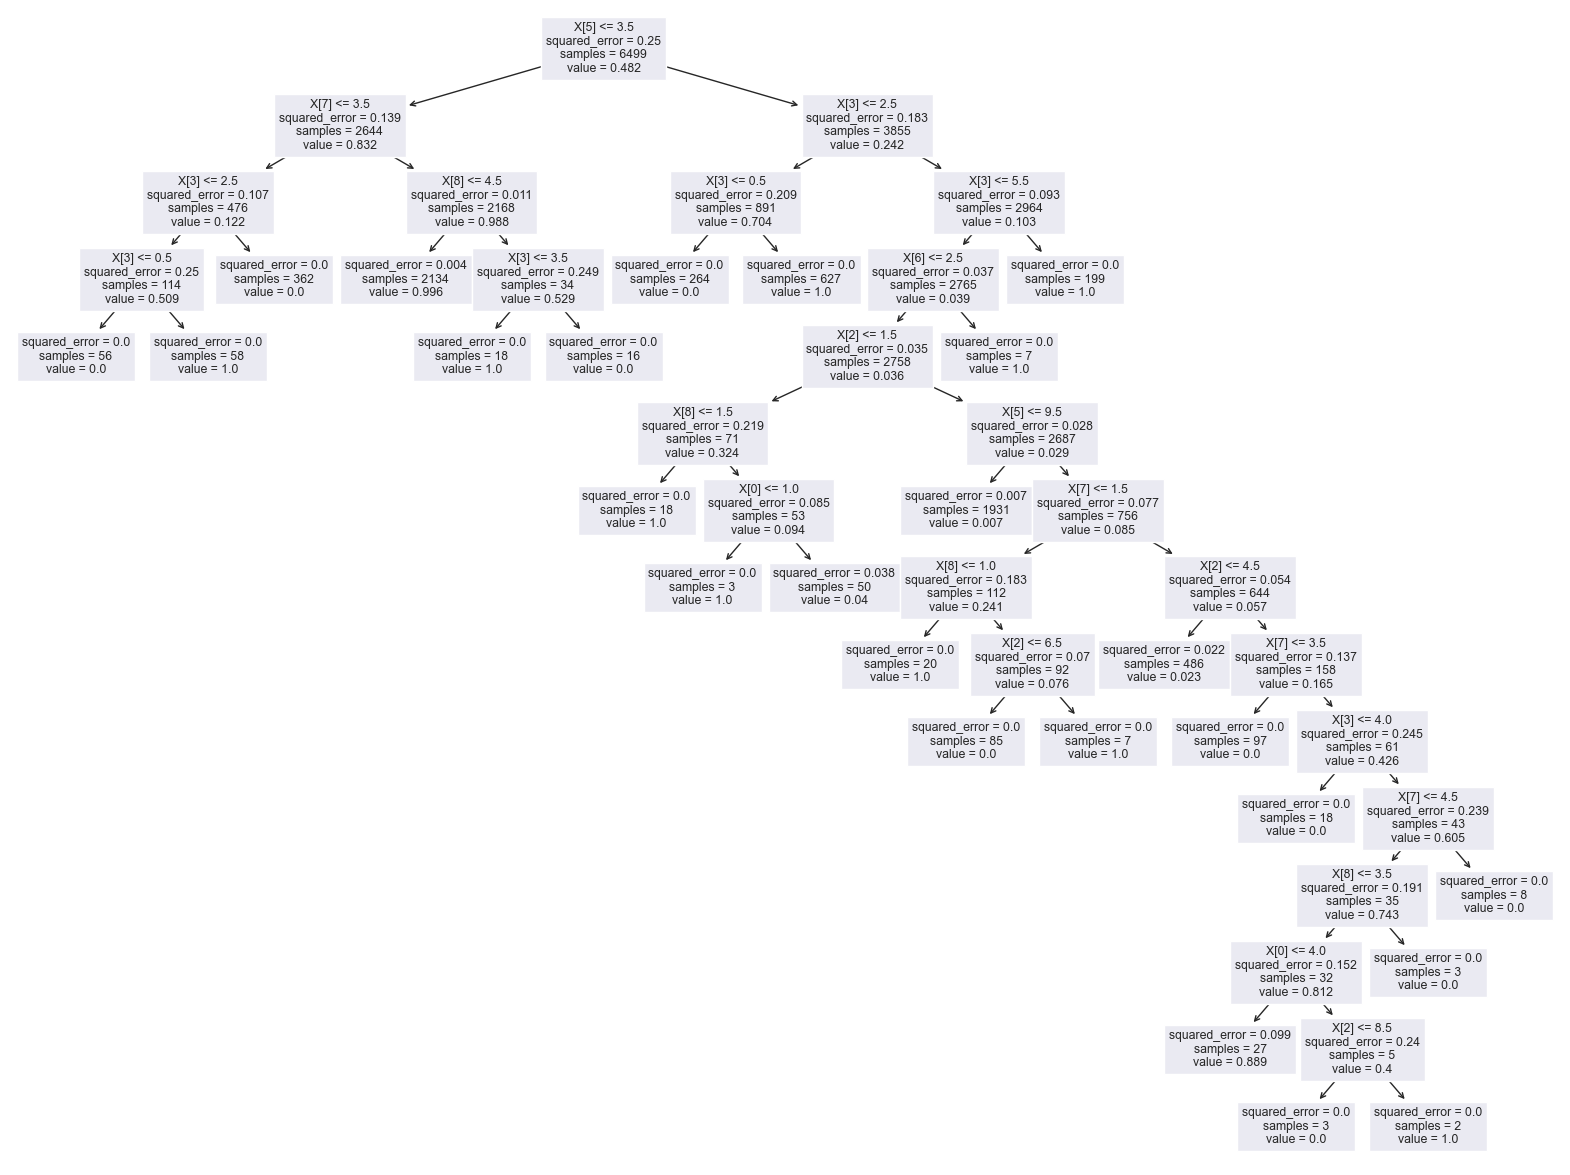

In [86]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
plot_tree(DTR)
plt.show()

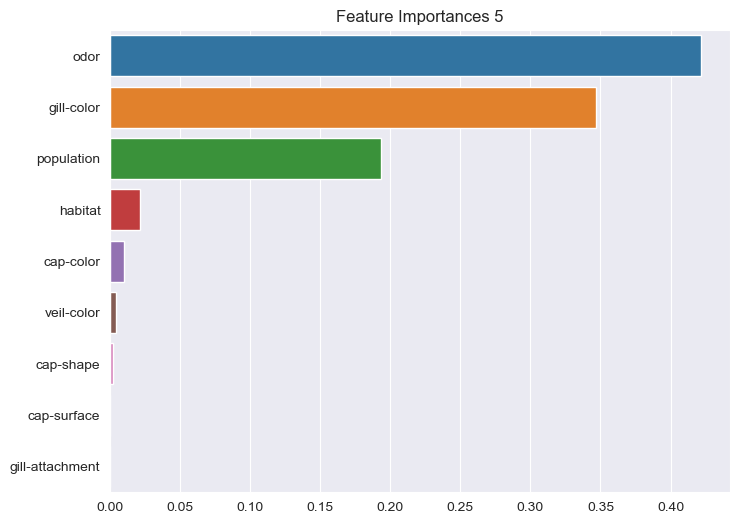

In [89]:
import seaborn as sns
feature_importance_values = DTR.feature_importances_
feature_importances = pd.Series(feature_importance_values, index=X_train.columns)

feature_top5 = feature_importances.sort_values(ascending=False)[:10]

plt.figure(figsize=[8, 6])
plt.title('Feature Importances 5')
sns.barplot(x=feature_top5, y=feature_top5.index)
plt.show()